# Project - Twitter US Airline Sentiment

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service"). 

#### Domain 
Aviation

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Submitted by: Deep Singh Chauhan

Imported basic libraries

In [1]:
#Load Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


Importing Google Drive for data loading and mounting 

In [2]:
from google.colab import drive

In [3]:
# Mounting Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Loading dataset into dataframe
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/NLP - Twitter US Airline Sentiment/Data/Tweets.csv')

In [5]:
# checking shape
print('\033[1mShape of Dataset: \033[0m', df.shape)

Shape of Dataset:  (14640, 15)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [7]:
# having look at data
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### Understand of data-columns

In [8]:
# Check for missing values percentage for each column
100*df.isna().sum()/len(df)

tweet_id                         0.000000
airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
negativereason                  37.308743
negativereason_confidence       28.128415
airline                          0.000000
airline_sentiment_gold          99.726776
name                             0.000000
negativereason_gold             99.781421
retweet_count                    0.000000
text                             0.000000
tweet_coord                     93.039617
tweet_created                    0.000000
tweet_location                  32.329235
user_timezone                   32.923497
dtype: float64

In [9]:
# Listing columns
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [10]:
# Drop all other columns except “text” and “airline_sentiment”.
df.drop(['tweet_id', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 
         'name', 'negativereason_gold', 'retweet_count', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone'], axis=1, inplace = True)

In [11]:
# checking shape again
df.shape

(14640, 2)

In [12]:
# sentiments count
print(df['airline_sentiment'].value_counts())

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


In [13]:
# sentiments percentage
print(df['airline_sentiment'].value_counts(normalize=True)*100)

negative    62.691257
neutral     21.168033
positive    16.140710
Name: airline_sentiment, dtype: float64


Data is skewed towards negative sentiments

In [14]:
# It will enable the entire row visible with truncation of the text. (We can see full text.)
pd.set_option('display.max_colwidth', None) 

In [15]:
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


## Text pre-processing: Data preparation

In [16]:
!pip install contractions

In [17]:
from bs4 import BeautifulSoup
import re
import contractions
import nltk

In [18]:
nltk.download('stopwords')                          
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
from nltk.corpus import stopwords                       
from nltk.tokenize import word_tokenize, sent_tokenize  
from nltk.stem import WordNetLemmatizer, LancasterStemmer
from nltk.tokenize.toktok import ToktokTokenizer  

In [20]:
lemmatizer = WordNetLemmatizer()
stemmer = LancasterStemmer()
tokenizer=ToktokTokenizer()

In [21]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))  

In [22]:
  # In Python, searching a set is much faster than searching a list, so convert the stop words to a set
stopwords_set = set(stopwords) 

In [23]:
# defining fuction to pre processing of text
def process_text(raw_text, trimming_method):
    returntext = []
    # 1. Remove HTML Tag
    nohtml_text = BeautifulSoup(raw_text).get_text() 

    # 2. Tokenization
    words = tokenizer.tokenize(nohtml_text)     

    for word in words:
        # 3. Replace contractions in string. (e.g. replace I'm --> I am) and so on
        contraction_text = contractions.fix(word)

        # 4. Remove non-letters (number, special charaters and punctuations)       
        letters_only = re.sub("[^a-zA-Z]", " ", contraction_text) 

        # 5. Convert to lower case
        lower_text = letters_only.lower()

        # 6 Lemmatize or Stemming
        if trimming_method == 'Stemming':
            trimmed_word = stemmer.stem(lower_text)
        else:
            trimmed_word = lemmatizer.lemmatize(lower_text, pos='v') 

    returntext.append(trimmed_word)

    # 7. Remove stop words
    meaningful_words = [w for w in returntext if not w in stopwords_set]   

    return ( " ".join( meaningful_words ))  

In [24]:
# checking text before and after pre processing
text = df['text'][212]
print('Original: ==> ', text)
print('Stemming: ==> ', process_text(text,'Stemming'))
print('Lemmatize:==> ', process_text(text,'Lemmatize'))

Original: ==>  @VirginAmerica twitter team. you guys killed it for rescheduling me asap. thank you!
Stemming: ==>   virginamerica twit team  guy kil resched as soon as possible  thank  
Lemmatize:==>   virginamerica twitter team  guy kill reschedule as soon as possible  thank  


In [25]:
# adding new column processedText to dataframe to check processed text along with raw text
df['processedText'] = df.apply(lambda row: process_text(row['text'], 'Stemming'), axis=1)

In [26]:
# printing first 5 rows with raw and processed text side by side
df.head()

,airline_sentiment,text,processedText
0,neutral,@VirginAmerica What @dhepburn said.,virginamerica dhepburn said
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.,virginamerica plu ad commerc expery tacky
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!,virginamerica didn today must mean nee tak anoth trip
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",virginamerica real aggress blast obnoxy entertain yo guest fac amp hav littl recours
4,negative,@VirginAmerica and it's a really big bad thing about it,virginamerica real big bad thing


In [27]:
df.head()

,airline_sentiment,text,processedText
0,neutral,@VirginAmerica What @dhepburn said.,virginamerica dhepburn said
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.,virginamerica plu ad commerc expery tacky
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!,virginamerica didn today must mean nee tak anoth trip
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",virginamerica real aggress blast obnoxy entertain yo guest fac amp hav littl recours
4,negative,@VirginAmerica and it's a really big bad thing about it,virginamerica real big bad thing


### Label Encoding

In [28]:
factorize = pd.factorize(df.airline_sentiment)[0]
factorize

array([0, 1, 0, ..., 0, 2, 0])

In [29]:
df['sentiments'] = factorize

In [30]:
df['sentiments'] = df['sentiments'].astype('category')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   airline_sentiment  14640 non-null  object  
 1   text               14640 non-null  object  
 2   processedText      14640 non-null  object  
 3   sentiments         14640 non-null  category
dtypes: category(1), object(3)
memory usage: 357.6+ KB


In [32]:
df.head(10)

,airline_sentiment,text,processedText,sentiments
0,neutral,@VirginAmerica What @dhepburn said.,virginamerica dhepburn said,0
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.,virginamerica plu ad commerc expery tacky,1
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!,virginamerica didn today must mean nee tak anoth trip,0
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",virginamerica real aggress blast obnoxy entertain yo guest fac amp hav littl recours,2
4,negative,@VirginAmerica and it's a really big bad thing about it,virginamerica real big bad thing,2
5,negative,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,virginamerica sery would pay flight seat didn hav thi playing real bad thing fly va,2
6,positive,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)",virginamerica ye near every tim fly vx thi ear worm won go away,1
7,neutral,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP",virginamerica real miss prim opportun men without hat parody there https t co mwpg grezp,0
8,positive,"@virginamerica Well, I didn't…but NOW I DO! :-D",virginamerica wel didn d,1
9,positive,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me.",virginamerica amaz ar hour early good,1


In [33]:
y = df['sentiments']

## Vectorization

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split

## CountVentorizer

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
countVectorizer = CountVectorizer(max_features=1000)                # Keep only 1000 features as number of features will increase the processing time.
data_features = countVectorizer.fit_transform(df['processedText'])

In [37]:
data_features = data_features.toarray()   

In [38]:
data_features.shape

(14640, 1000)

In [39]:
X = data_features

Split the dataset into training, testing, and validation set

In [40]:
# Train test split using features and target variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [41]:
# shape of all sets
print(f'training shapes: {X_train.shape}, {y_train.shape}')
print(f'testing shapes: {X_test.shape}, {y_test.shape}')

training shapes: (10248, 1000), (10248,)
testing shapes: (4392, 1000), (4392,)


In [42]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

cvs = np.mean(cross_val_score(forest, X, y, cv=10))

# creating accuracy dataframe to store different model performance for later comparision
accuracyDf = pd.DataFrame({'Method':['CountVectorizer'], 'Word Processor':'Stemming', 'ValidationScore': cvs})

accuracyDf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)


,Method,Word Processor,ValidationScore
0,CountVectorizer,Stemming,0.699249


In [43]:
# Predict the result for test data using the model built above.

result = forest.predict(X_test)

[[ 442   95  399]
 [ 120  397  198]
 [ 254  100 2387]]


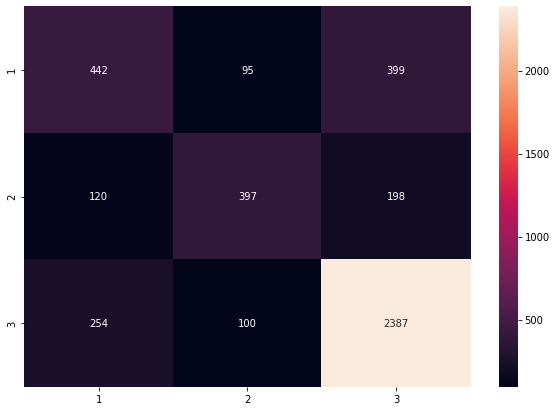

In [44]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"], columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

In [45]:
print (classification_report(y_test, result))

              precision    recall  f1-score   support

           0       0.54      0.47      0.50       936
           1       0.67      0.56      0.61       715
           2       0.80      0.87      0.83      2741

    accuracy                           0.73      4392
   macro avg       0.67      0.63      0.65      4392
weighted avg       0.72      0.73      0.73      4392



In [46]:
# trying with Lemmatizer word processor

df['processedText'] = df.apply(lambda row: process_text(row['text'], 'Lemmatize'), axis=1)

countVectorizer = CountVectorizer(max_features=1000)                # Keep only 1000 features as number of features will increase the processing time.
data_features = countVectorizer.fit_transform(df['processedText'])
data_features = data_features.toarray()  

X = data_features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)
forest = forest.fit(X_train, y_train)

cvs = np.mean(cross_val_score(forest, X, y, cv=10))

tempScore = pd.DataFrame({'Method':['CountVectorizer'], 'Word Processor':'Lemmatize', 'ValidationScore': cvs})
accuracyDf = pd.concat([accuracyDf, tempScore])
accuracyDf


,Method,Word Processor,ValidationScore
0,CountVectorizer,Stemming,0.699249
0,CountVectorizer,Lemmatize,0.693852


## TfidfVectorizer

In [47]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

# df['processedText'] = df.apply(lambda row: process_text(row['text'], 'Lemmatize'), axis=1)

vectorizer = TfidfVectorizer(max_features=1000)
data_features = vectorizer.fit_transform(df['processedText'])
data_features = data_features.toarray()

print('data_features shape: ', data_features.shape)

X = data_features

# Train test split using features and target variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

data_features shape:  (14640, 1000)


In [48]:
forest = RandomForestClassifier(n_estimators=10, n_jobs=4)
forest = forest.fit(X_train, y_train)
print(forest)

cvs = np.mean(cross_val_score(forest, X, y, cv=10))

tempScore = pd.DataFrame({'Method':['TfidfVectorizer'], 'Word Processor':'Lemmatize', 'ValidationScore': cvs})
accuracyDf = pd.concat([accuracyDf, tempScore])

accuracyDf


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)


,Method,Word Processor,ValidationScore
0,CountVectorizer,Stemming,0.699249
0,CountVectorizer,Lemmatize,0.693852
0,TfidfVectorizer,Lemmatize,0.704781


In [49]:
# Predict the result for test data using the model built above.

result = forest.predict(X_test)

[[ 443   86  407]
 [ 134  405  176]
 [ 222   91 2428]]


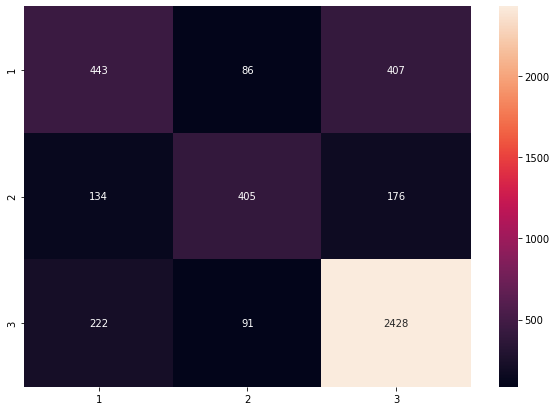

In [50]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"], columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

In [51]:
print (classification_report(y_test, result))

              precision    recall  f1-score   support

           0       0.55      0.47      0.51       936
           1       0.70      0.57      0.62       715
           2       0.81      0.89      0.84      2741

    accuracy                           0.75      4392
   macro avg       0.69      0.64      0.66      4392
weighted avg       0.73      0.75      0.74      4392



In [52]:
# trying with Stemming word processor along with TfidfVectorizer

df['processedText'] = df.apply(lambda row: process_text(row['text'], 'Stemming'), axis=1)

vectorizer = TfidfVectorizer(max_features=1000)
data_features = vectorizer.fit_transform(df['processedText'])
data_features = data_features.toarray()

print('data_features shape: ', data_features.shape)

X = data_features

# Train test split using features and target variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)
forest = forest.fit(X_train, y_train)
print(forest)

cvs = np.mean(cross_val_score(forest, X, y, cv=10))

tempScore = pd.DataFrame({'Method':['TfidfVectorizer'], 'Word Processor':'Stemming', 'ValidationScore': cvs})
accuracyDf = pd.concat([accuracyDf, tempScore])

accuracyDf


data_features shape:  (14640, 1000)
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)


,Method,Word Processor,ValidationScore
0,CountVectorizer,Stemming,0.699249
0,CountVectorizer,Lemmatize,0.693852
0,TfidfVectorizer,Lemmatize,0.704781
0,TfidfVectorizer,Stemming,0.703074


## Summary

- We used dataset which has tweet data in text format and their sentiment as postivie, negativa and neutral.
- The goal was to build a model for text-classification.
- We Pre-processed the data using variuos techniques and libraries.
- The pre-precessed data is converted to numbers, so that we can feed the data in the model.
- After building the classification model, we predicted the result for the test data.
- After that we saw that using the above techniques, our model performed good in perspective of how the text classification models perform.
- we can increase accuracy is to use different variations of Pre-processing techniques.
- We can see from cross validation score that best combination is CountVectorizer along with Lemmatize word processing

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Assignment Completed

Project work is checked in to github on below path:

https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-may20-deepkanpur